In [464]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

#the above imports the plotting library matplotlib

In [465]:
#other useful imports we've seen before

import h5py
import numpy as np
import scipy as sp
import scipy.stats as stats

In [466]:
#ok let's load the data 
DATA_PATH = "/home/chengxuz/Class/psych253_2018/data/ventral_neural_data.hdf5"
Ventral_Dataset = h5py.File(DATA_PATH)

In [467]:
#And prepare the same useful constructions we've done a couple of times

categories = Ventral_Dataset['image_meta']['category'][:]   #array of category labels for all images  --> shape == (5760,)
unique_categories = np.unique(categories)                #array of unique category labels --> shape == (8,)
objects = Ventral_Dataset['image_meta']['object_name'][:]   #array of object labels for all images --> shape == (5670,)
unique_objects = np.unique(objects)                      #array of unique object labels --> shape == (64,) 

objects_by_category = {c: np.unique(objects[categories == c]) 
                       for c in unique_categories}

all_images = Ventral_Dataset['images']

Neural_Data = Ventral_Dataset['time_averaged_trial_averaged'][:]

IT_NEURONS = Ventral_Dataset['neural_meta']['IT_NEURONS']
V4_NEURONS = Ventral_Dataset['neural_meta']['V4_NEURONS']

V4_Neural_Data = Neural_Data[:, V4_NEURONS]
IT_Neural_Data = Neural_Data[:, IT_NEURONS]

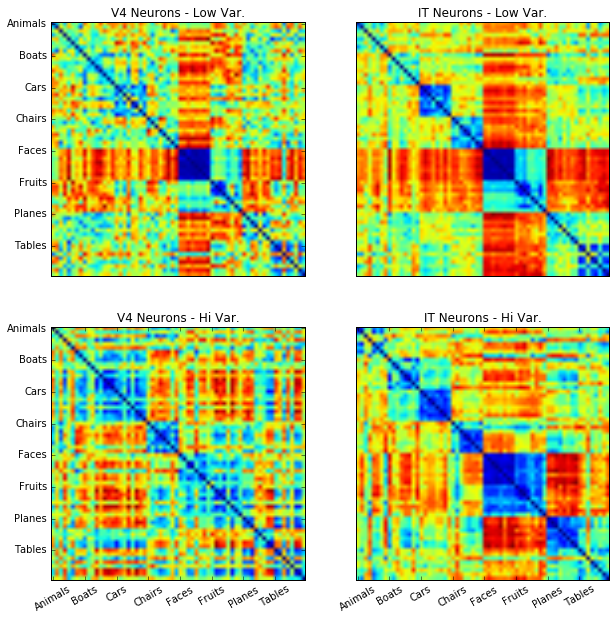

In [468]:
image_object_means_by_category_var0 = np.row_stack([[all_images[(objects == o) & (var_level == 'V0'), :, :].mean(0)
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])
image_object_means_by_category_var0 = image_object_means_by_category_var0.reshape((64, 256**2))

image_object_means_by_category_var6 = np.row_stack([[all_images[(objects == o) & (var_level == 'V6'), :, :].mean(0)
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])
image_object_means_by_category_var6 = image_object_means_by_category_var6.reshape((64, 256**2))

V4_object_means_by_category_var0 = np.row_stack([[V4_Neural_Data[(objects == o) & (var_level == 'V0')].mean(0) 
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])

V4_object_means_by_category_var6 = np.row_stack([[V4_Neural_Data[(objects == o) & (var_level == 'V6')].mean(0) 
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])

IT_object_means_by_category_var0 = np.row_stack([[IT_Neural_Data[(objects == o) & (var_level == 'V0')].mean(0) 
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])



IT_object_means_by_category_var6 = np.row_stack([[IT_Neural_Data[(objects == o) & (var_level == 'V6')].mean(0) 
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])

V4_rdm_var0 = 1 - np.corrcoef(V4_object_means_by_category_var0)
IT_rdm_var0  = 1 - np.corrcoef(IT_object_means_by_category_var0)

V4_rdm_var6 = 1 - np.corrcoef(V4_object_means_by_category_var6)
IT_rdm_var6  = 1 - np.corrcoef(IT_object_means_by_category_var6)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title('V4 Neurons - Low Var.')
plt.imshow(V4_rdm_var0)
plt.yticks(np.arange(0, 64, 8), unique_categories); plt.xticks([]);
plt.subplot(2, 2, 2)
plt.title('IT Neurons - Low Var.')
plt.imshow(IT_rdm_var0)
plt.gca().set_xticks([]); plt.xticks([]); plt.yticks([]); plt.xticks([]);
plt.subplot(2, 2, 3)
plt.title('V4 Neurons - Hi Var.')
plt.imshow(V4_rdm_var6)
plt.yticks(np.arange(0, 64, 8), unique_categories); 
plt.xticks(np.arange(0, 64, 8), unique_categories, rotation=30);
plt.subplot(2, 2, 4)
plt.title('IT Neurons - Hi Var.')
plt.imshow(IT_rdm_var6)
plt.xticks(np.arange(0, 64, 8), unique_categories, rotation=30); plt.yticks([]);

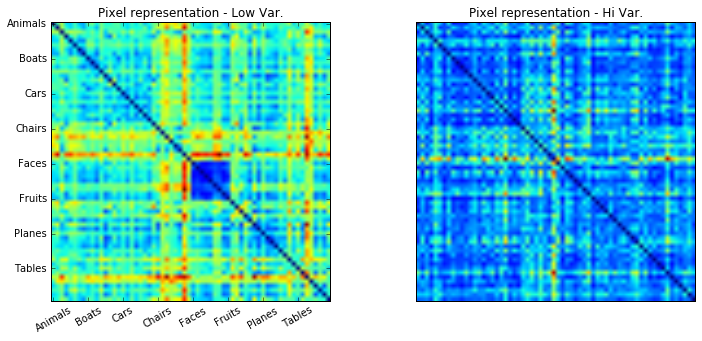

In [469]:
pixels_rdm_var0 = 1 - np.corrcoef(image_object_means_by_category_var0)
pixels_rdm_var6 = 1 - np.corrcoef(image_object_means_by_category_var6)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Pixel representation - Low Var.')
plt.imshow(pixels_rdm_var0)
plt.yticks(np.arange(0, 64, 8), unique_categories); 
plt.xticks(np.arange(0, 64, 8), unique_categories, rotation=30);

plt.subplot(1, 2, 2)
plt.title('Pixel representation - Hi Var.')
plt.imshow(pixels_rdm_var6)
plt.yticks([]); 
plt.xticks([]);

#interesting -- at low variation there is some structure -- especially, the faces stand out
#but at high variation basically everything is mush

In [470]:
#We need to take the upper right triangle (URT) of the RDMs for comparison purposes
from scipy.spatial.distance import squareform
V4_rdm_var0_flat = squareform(V4_rdm_var0, checks=False)
V4_rdm_var0_flat.shape
#see, the shape is 64 * 63 / 2 = 2016

V4_rdm_var6_flat = squareform(V4_rdm_var6, checks=False)
IT_rdm_var0_flat = squareform(IT_rdm_var0, checks=False)
IT_rdm_var6_flat = squareform(IT_rdm_var6, checks=False)
pixels_rdm_var0_flat = squareform(pixels_rdm_var0, checks=False)
pixels_rdm_var6_flat = squareform(pixels_rdm_var6, checks=False)

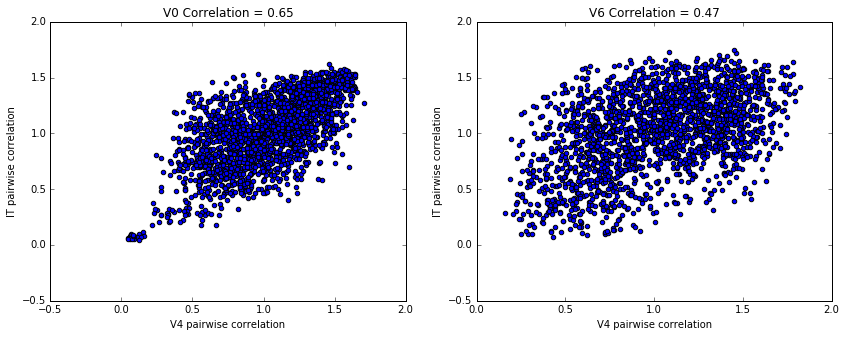

In [471]:
#now that we've got the URT, let's look at some comparisons, 
#first of IT vs V4 at low and high variation
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.scatter(V4_rdm_var0_flat, IT_rdm_var0_flat)
corrval_V0 = stats.pearsonr(V4_rdm_var0_flat, IT_rdm_var0_flat)[0]
plt.title('V0 Correlation = %.2f' % corrval_V0)
plt.xlabel('V4 pairwise correlation')
plt.ylabel('IT pairwise correlation')


plt.subplot(1, 2, 2)
plt.scatter(V4_rdm_var6_flat, IT_rdm_var6_flat)
corrval_V6 = stats.pearsonr(V4_rdm_var6_flat, IT_rdm_var6_flat)[0]
plt.title('V6 Correlation = %.2f' % corrval_V6)
plt.xlabel('V4 pairwise correlation')
plt.ylabel('IT pairwise correlation')

#if these numbers are to be believed, V4 and IT representations are more similar at low variation images
#than they are for high variation images. 

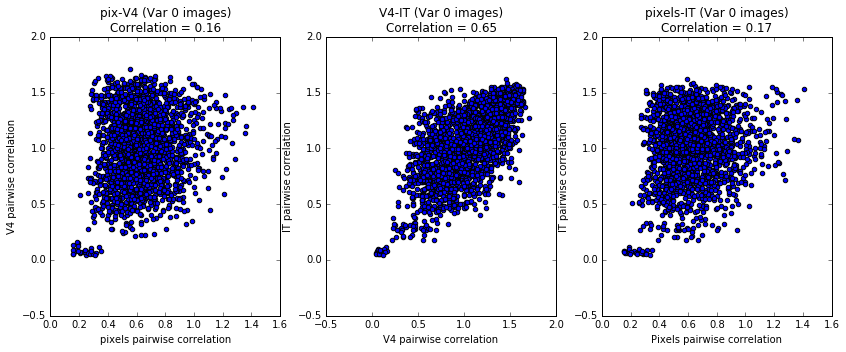

In [472]:
#now let's compare across pixels, V4 and IT 
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.scatter(pixels_rdm_var0_flat, V4_rdm_var0_flat)
corrval_pixV4 = stats.pearsonr(pixels_rdm_var0_flat, V4_rdm_var0_flat)[0]
plt.title('pix-V4 (Var 0 images)\nCorrelation = %.2f' % corrval_pixV4)
plt.xlabel('pixels pairwise correlation')
plt.ylabel('V4 pairwise correlation')

plt.subplot(1, 3, 2)
plt.scatter(V4_rdm_var0_flat, IT_rdm_var0_flat)
corrval_V4IT = stats.pearsonr(V4_rdm_var0_flat, IT_rdm_var0_flat)[0]
plt.title('V4-IT (Var 0 images)\nCorrelation = %.2f' % corrval_V4IT)
plt.xlabel('V4 pairwise correlation')
plt.ylabel('IT pairwise correlation')

plt.subplot(1, 3, 3)
plt.scatter(pixels_rdm_var0_flat, IT_rdm_var0_flat)
corrval_pixIT = stats.pearsonr(pixels_rdm_var0_flat, IT_rdm_var0_flat)[0]
plt.title('pixels-IT (Var 0 images)\nCorrelation = %.2f' % corrval_pixIT)
plt.xlabel('Pixels pairwise correlation')
plt.ylabel('IT pairwise correlation')

#V4 representation looks much closer to IT than either does to the pixels

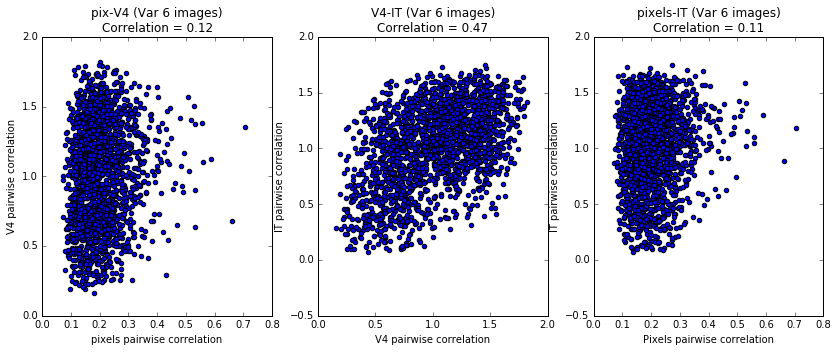

In [473]:
#And this result is especially true at high variation images
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.scatter(pixels_rdm_var6_flat, V4_rdm_var6_flat)
corrval_pixV4 = stats.pearsonr(pixels_rdm_var6_flat, V4_rdm_var6_flat)[0]
plt.title('pix-V4 (Var 6 images)\nCorrelation = %.2f' % corrval_pixV4)
plt.xlabel('pixels pairwise correlation')
plt.ylabel('V4 pairwise correlation')

plt.subplot(1, 3, 2)
plt.scatter(V4_rdm_var6_flat, IT_rdm_var6_flat)
corrval_V4IT = stats.pearsonr(V4_rdm_var6_flat, IT_rdm_var6_flat)[0]
plt.title('V4-IT (Var 6 images)\nCorrelation = %.2f' % corrval_V4IT)
plt.xlabel('V4 pairwise correlation')
plt.ylabel('IT pairwise correlation')

plt.subplot(1, 3, 3)
plt.scatter(pixels_rdm_var6_flat, IT_rdm_var6_flat)
corrval_pixIT = stats.pearsonr(pixels_rdm_var6_flat, IT_rdm_var6_flat)[0]
plt.title('pixels-IT (Var 6 images)\nCorrelation = %.2f' % corrval_pixIT)
plt.xlabel('Pixels pairwise correlation')
plt.ylabel('IT pairwise correlation')



Cross-Animal Correlation= 0.55


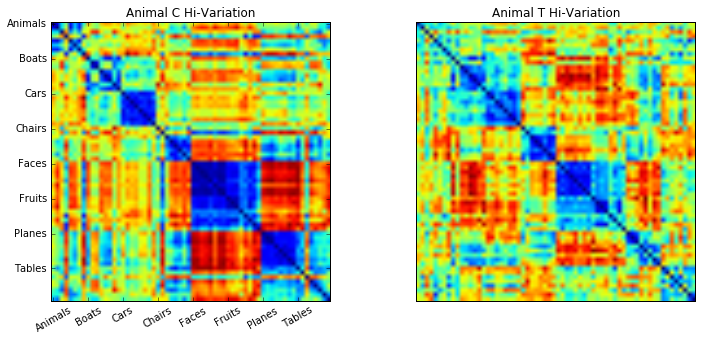

In [474]:
#but how close is V4 to IT? 
#well, actually let's compare to w/in animal controls

chabo = Ventral_Dataset['neural_meta']['ANIMAL_INFO'][:] == 'Chabo'
chabo_IT_NEURONS = IT_NEURONS[chabo[IT_NEURONS]]
chabo_IT_Neural_Data = Neural_Data[:, chabo_IT_NEURONS]

chabo_IT_object_means_by_category_var6 = np.row_stack([[chabo_IT_Neural_Data[(objects == o) & (var_level == 'V6')].mean(0) 
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])

tito = Ventral_Dataset['neural_meta']['ANIMAL_INFO'][:] == 'Tito'
tito_IT_NEURONS = IT_NEURONS[tito[IT_NEURONS]]
tito_IT_Neural_Data = Neural_Data[:, tito_IT_NEURONS]

tito_IT_object_means_by_category_var6 = np.row_stack([[tito_IT_Neural_Data[(objects == o) & (var_level == 'V6')].mean(0) 
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])

chabo_IT_rdm_var6  = 1 - np.corrcoef(chabo_IT_object_means_by_category_var6)
tito_IT_rdm_var6  = 1 - np.corrcoef(tito_IT_object_means_by_category_var6)

chabo_IT_rdm_var6_flat = squareform(chabo_IT_rdm_var6, checks=False)
tito_IT_rdm_var6_flat = squareform(tito_IT_rdm_var6, checks=False)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(chabo_IT_rdm_var6)
plt.title('Animal C Hi-Variation')
plt.yticks(np.arange(0, 64, 8), unique_categories); 
plt.xticks(np.arange(0, 64, 8), unique_categories, rotation=30);

plt.subplot(1, 2, 2)
plt.imshow(tito_IT_rdm_var6)
plt.title('Animal T Hi-Variation')
plt.yticks([]); plt.xticks([]); 

#similar between, but some notable differences -- Animal T seems "weaker" than Animal C!

ct_corr = stats.pearsonr(chabo_IT_rdm_var6_flat, tito_IT_rdm_var6_flat)[0]
print('Cross-Animal Correlation= %.2f' % ct_corr)

In [475]:
#in fact, two animals' ITs are closer to each other -- but not by much than V4 overall is IT overall
#when pooled between the two animals.
ct_corr = stats.pearsonr(chabo_IT_rdm_var6_flat, tito_IT_rdm_var6_flat)[0]
print('Cross-Animal Correlation= %.2f' % ct_corr)

corrval_V4IT = stats.pearsonr(V4_rdm_var6_flat, IT_rdm_var6_flat)[0]
print('V4-IT correlation = %.2f' % corrval_V4IT)

Cross-Animal Correlation= 0.55
V4-IT correlation = 0.47


In [476]:
#lets dig into this a little more and look at both animals separated by V4 and IT
tito_V4_NEURONS = V4_NEURONS[tito[V4_NEURONS]]
chabo_V4_NEURONS = V4_NEURONS[chabo[V4_NEURONS]]
tito_V4_Neural_Data = Neural_Data[:, tito_V4_NEURONS]
chabo_V4_Neural_Data = Neural_Data[:, chabo_V4_NEURONS]

tito_V4_object_means_by_category_var6 = np.row_stack([[tito_V4_Neural_Data[(objects == o) & (var_level == 'V6')].mean(0) 
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])

chabo_V4_object_means_by_category_var6 = np.row_stack([[chabo_V4_Neural_Data[(objects == o) & (var_level == 'V6')].mean(0) 
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])

chabo_V4_rdm_var6_flat  = squareform(1 - np.corrcoef(chabo_V4_object_means_by_category_var6), checks=False)
tito_V4_rdm_var6_flat  = squareform(1 - np.corrcoef(tito_V4_object_means_by_category_var6), checks=False)

In [477]:
#ok let's compute all the pairwise distances between areas per animal
#there are 4 animal-areas (two animals x two areas), so there are choose(4, 2) = 6 unique pairwise distances
chaboIT_titoIT_corr = stats.pearsonr(chabo_IT_rdm_var6_flat, tito_IT_rdm_var6_flat)[0]
chaboV4_titoV4_corr = stats.pearsonr(chabo_V4_rdm_var6_flat, tito_V4_rdm_var6_flat)[0]
chaboIT_titoV4_corr = stats.pearsonr(chabo_IT_rdm_var6_flat, tito_V4_rdm_var6_flat)[0]
chaboV4_titoIT_corr = stats.pearsonr(chabo_V4_rdm_var6_flat, tito_IT_rdm_var6_flat)[0]
chaboV4_chaboIT_corr = stats.pearsonr(chabo_IT_rdm_var6_flat, chabo_V4_rdm_var6_flat)[0]
titoV4_titoIT_corr = stats.pearsonr(tito_IT_rdm_var6_flat, tito_V4_rdm_var6_flat)[0]

print('Animal C IT / Animal T IT Correlation= %.2f' % chaboIT_titoIT_corr)
print('Animal C V4 / Animal T V4 Correlation= %.2f' % chaboV4_titoV4_corr)
print('Animal C IT / Animal T V4 Correlation= %.2f' % chaboIT_titoV4_corr)
print('Animal C V4 / Animal T IT Correlation= %.2f' % chaboV4_titoIT_corr)
print('Animal C V4 / Animal C IT Correlation= %.2f' % chaboV4_chaboIT_corr)
print('Animal T V4 / Animal T IT Correlation= %.2f' % titoV4_titoIT_corr)

#let's make a distance matrix of them in whatever order
#say ... titoV4 chaboV4 titoIT chaboIT
distmat = 1 - np.array([[1, chaboV4_titoV4_corr, titoV4_titoIT_corr, chaboIT_titoV4_corr],
                        [chaboV4_titoV4_corr, 1, chaboV4_titoIT_corr, chaboV4_chaboIT_corr],
                        [titoV4_titoIT_corr, chaboV4_titoIT_corr, 1, chaboIT_titoIT_corr],
                        [chaboIT_titoV4_corr, chaboV4_chaboIT_corr, chaboIT_titoIT_corr, 1]])

Animal C IT / Animal T IT Correlation= 0.55
Animal C V4 / Animal T V4 Correlation= 0.68
Animal C IT / Animal T V4 Correlation= 0.45
Animal C V4 / Animal T IT Correlation= 0.58
Animal C V4 / Animal C IT Correlation= 0.31
Animal T V4 / Animal T IT Correlation= 0.69


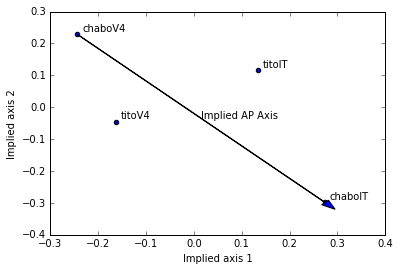

In [564]:
#Ok, let's visualize what we got.  Have 4 points (4 animal-areas) but really to 
#want to look at them in 2 dimensions.  How? Let's use multi-dimensional scaling

from sklearn.manifold import MDS
x, y = MDS(dissimilarity='precomputed').fit_transform(distmat).T
plt.scatter(x, y)
labels = ['titoV4', 'chaboV4', 'titoIT', 'chaboIT']
for i in range(4):
    plt.annotate(labels[i], (x[i], y[i]), (x[i]+.01, y[i]+.01))
plt.xlabel('Implied axis 1')
plt.ylabel('Implied axis 2')

plt.arrow(x[1], y[1], x[3] - x[1], y[3]-y[1])
plt.text(x[1] + (x[3] - x[1]) / 2, y[1] + (y[3] - y[1]) / 2, 'Implied AP Axis')

#Conclusion:  The "IT" arrays in animal T are probably more posterior than they are in animal C.  
#             (While the V4 arrays are pretty close between the two animals.)
#             So we can perhaps think of Animal C's IT array as the "truly" IT-like area.  
#background:  Yes, that can be seen to be true from surgerical notes. 

plt.savefig('tito_chabo.pdf')

## Single Neuron Correlations

In [5]:
"""
We're interested in correlations of neural data with potential behavioral outputs. 
So, for example, let's say wanted to use neurons to predict the horizontal position of the 
object in the image -- that is, the "translation_y" field of the image metadata. 
""";

In [483]:
#first let's load the y-position data
ypos = Ventral_Dataset['image_meta']['translation_y'][:] 

In [487]:
ypos[-10:]

array([-0.103, -0.411,  0.311, -0.043,  0.571,  0.125, -0.194, -0.283,
       -0.014,  0.145])

In [484]:
Neural_Data.shape

(5760, 296)

In [488]:
#Now, let's get the correlation between this metadata and neural responses
#for each neuron
corr_ypos = np.array([stats.pearsonr(Neural_Data[:, i], ypos)[0] 
                      for i in range(Neural_Data.shape[1])])

corr_ypos.shape
#right, there are 296 -- one for each neuron

(296,)

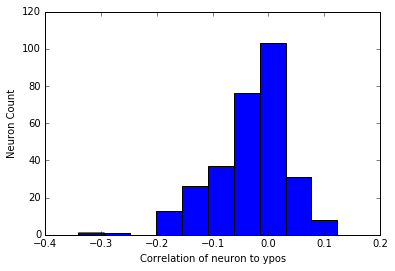

In [489]:
#let's see how good or bad our overall correlations are
plt.hist(corr_ypos)
plt.xlabel('Correlation of neuron to ypos')
plt.ylabel('Neuron Count')
#a few outliers, mostly not that great

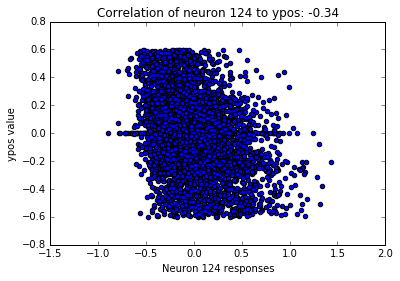

In [490]:
#let's visualize the correlation of the best neuron
abs_corr_ypos = np.abs(corr_ypos) #first, get the absolute correlations, since that's what matters
best_ind = most_corred = abs_corr_ypos.argmax()   #now find the index of the most-absolute-correlated neuron
most_corred_resp = Neural_Data[:, best_ind]       #get that neuron's responses
plt.scatter(most_corred_resp , ypos)              #let's scatter-plot it against the true ypos values
plt.xlabel('Neuron %d responses' % best_ind)
plt.ylabel('ypos value')
plt.title('Correlation of neuron %d to ypos: %.2f' % (best_ind, corr_ypos[best_ind]))

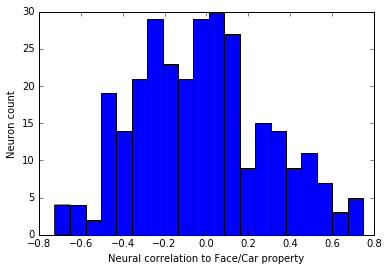

In [491]:
#Ok; we'll come back to these correlations later in the course. 
#for now, let's focus on relationships of category variables

#specifically, lets look at correlations bewteen neurons and
#the property of "Being a Face or Being a Car"
# .... at variation levels V0  (low) and V3 (medium)

#get per-stimulus arrays of category and variation level
category = Ventral_Dataset['image_meta']['category'][:]
var_level = Ventral_Dataset['image_meta']['variation_level'][:]

#subselect for being V0/V3 variation level and being a face or a car
v0v3 = ((var_level == 'V0') | (var_level == 'V3'))
face_or_car = ((category == 'Faces') | (category == 'Cars'))
subset_inds = v0v3 & face_or_car
Neural_Data_subset = Neural_Data[subset_inds]  #<-- neural responses just for V0/V3 car and face images
category_subset = (category[subset_inds] == 'Faces') #<-- boolean variable as to whether it's a car or a face

#now compute correlations between neuron responses and this output property
corr_face_vs_car = np.array([stats.pearsonr(Neural_Data_subset[:, i], category_subset)[0] 
                      for i in range(Neural_Data.shape[1])])

#let's plot our results
plt.hist(corr_face_vs_car, bins=20)
plt.xlabel('Neural correlation to Face/Car property')
plt.ylabel('Neuron count')

#hey -- some of the neurons are pretty highly correlated to this! 
#(though maybe not unexpected from face-neuron results of last time)

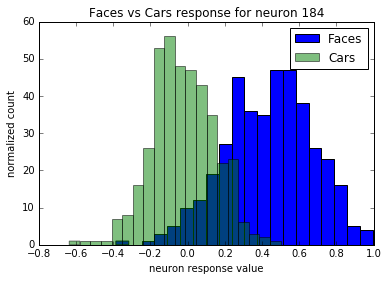

In [492]:
#Lets look at our results a bit more carefully

#find the most (absolutely) highly-correlated neuron
neurons_sorted_by_facevscar_abscorrelation = np.abs(corr_face_vs_car).argsort()
best_ind_facevscar = neurons_sorted_by_facevscar_abscorrelation[-1]

#this is a generic functio plotting distributions of responses
#for data two categories (a target and a "nottarget")
def hist_plot(resp, target_inds, target, nottarget):
    responses_on_target = resp[target_inds]
    responses_on_nottarget = resp[np.invert(target_inds)]
    l0 = plt.hist(responses_on_target, bins=20);
    l1 = plt.hist(responses_on_nottarget, bins=20, alpha=0.5);
    plt.legend([l0[2][0], l1[2][0]], [target, nottarget])
    plt.xlabel('neuron response value')
    plt.ylabel('normalized count')

most_corred_resp = Neural_Data_subset[:, best_ind_facevscar]
hist_plot(most_corred_resp, category_subset, 'Faces', 'Cars')
plt.title('Faces vs Cars response for neuron %d' % best_ind_facevscar)


In [493]:
#this is a generic function computing correctness for a
#prediction vs an actual.  This assumes the predictions are binary 
#(either 0  or 1)

def fraction_correct(predicted, actual):
    #get number of trials where predicted equals actual
    correct = (predicted == actual).sum()  
    #get total number of trials
    total = len(actual)
    #get fraction correct
    frac = correct / float(total)
    return frac

In [494]:
#So, if we made a binary judgement setting above a threshold ... 
threshold = .2
predicted_face = most_corred_resp > threshold

# ... we could compute a fraction correction
acc = fraction_correct(predicted_face, category_subset)
print('The percent correct is %.2f%%' % (acc * 100)) 

#setting the threshold at .2 is not bad

The percent correct is 87.38%


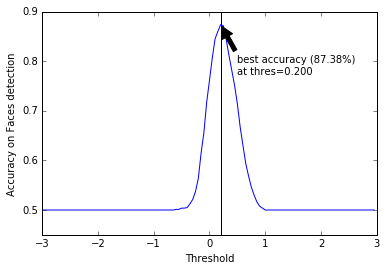

In [495]:
#let's look at performance as a function of threshold 

def plot_threshold_acc(resp, categories, target):
    threshold_series = np.arange(-3, 3, .05)
    pcs = [fraction_correct(resp > t, categories) 
                        for t in threshold_series]
    best_thres_ind = np.argmax(pcs)
    best_thres = threshold_series[best_thres_ind]
    best_acc = pcs[best_thres_ind]
    plt.plot(threshold_series, pcs)
    plt.axvline(best_thres, color='k')
    plt.xlabel('Threshold')
    plt.ylabel('Accuracy on %s detection' % target)
    plt.annotate('best accuracy (%.2f%%)\nat thres=%.3f' % (best_acc * 100, best_thres),
                 xy=(best_thres, best_acc), 
                 xytext=(best_thres + .3, best_acc - .1),
                arrowprops=dict(facecolor='black', shrink=0.05),
                )
    
plot_threshold_acc(most_corred_resp, category_subset, 'Faces')
#in fact, .2 was the optimal threshold
#also, we can see chance is 50%

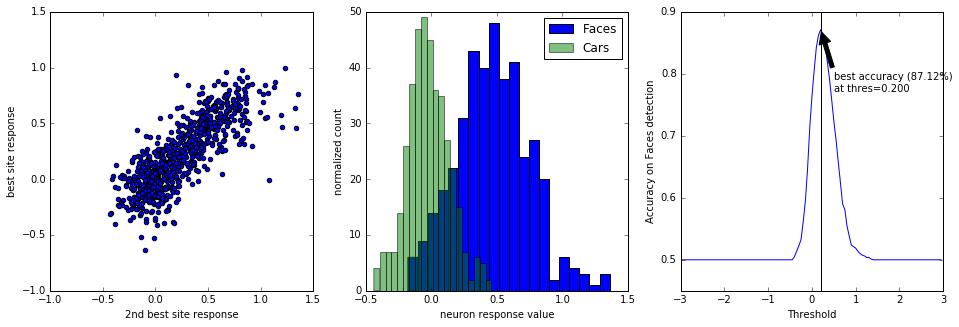

In [496]:
#how does the second best individual neuron at this Car/Face task look?
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
secondbest_ind_facevscar = neurons_sorted_by_facevscar_abscorrelation[-2]
secondmost_corred_resp = Neural_Data_subset[:, secondbest_ind_facevscar]
plt.scatter(secondmost_corred_resp, most_corred_resp)
plt.xlabel('2nd best site response')
plt.ylabel('best site response')

plt.subplot(1, 3, 2)
hist_plot(secondmost_corred_resp, category_subset, 'Faces', 'Cars')

plt.subplot(1, 3, 3)
plot_threshold_acc(secondmost_corred_resp, category_subset, 'Faces')

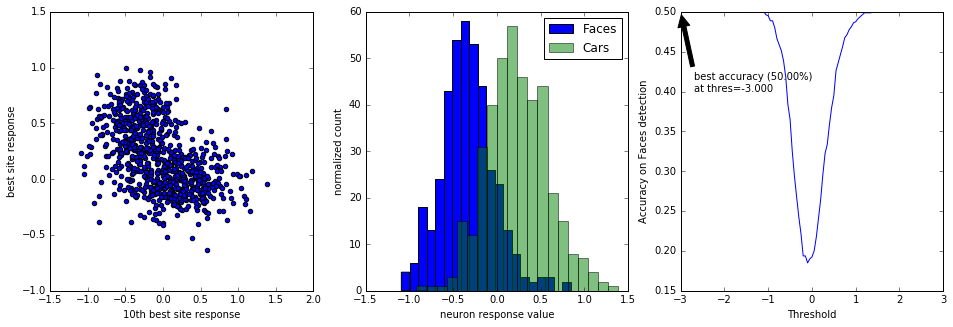

In [497]:
#what about the tenth best neuron?
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
tenthbest_ind = neurons_sorted_by_facevscar_abscorrelation[-10]
tenthmost_corred_resp = Neural_Data_subset[:, tenthbest_ind]
plt.scatter(tenthmost_corred_resp, most_corred_resp)
plt.xlabel('10th best site response')
plt.ylabel('best site response')

plt.subplot(1, 3, 2)
hist_plot(tenthmost_corred_resp, category_subset, 'Faces', 'Cars')

plt.subplot(1, 3, 3)
plot_threshold_acc(tenthmost_corred_resp, category_subset, 'Faces')

#ok weird -- we really need to multiple this guy by -1, since it's anti-correlated

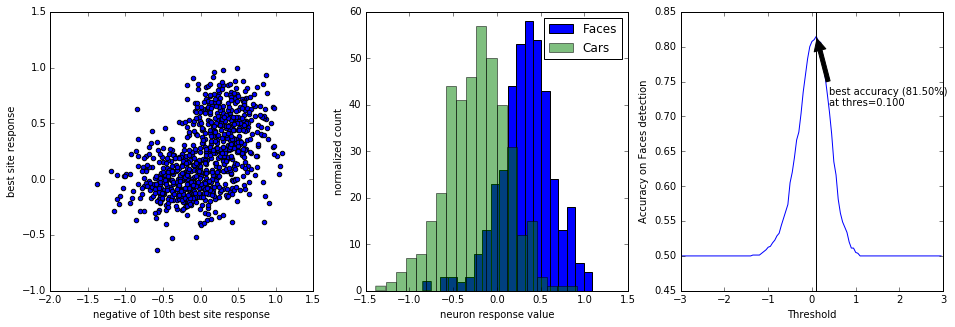

In [498]:
#ok now that we've multiplied by -1 things look more normal
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
tenthbest_ind = neurons_sorted_by_facevscar_abscorrelation[-10]
tenthmost_corred_resp = -Neural_Data_subset[:, tenthbest_ind]
plt.scatter(tenthmost_corred_resp, most_corred_resp)
plt.xlabel('negative of 10th best site response')
plt.ylabel('best site response')

plt.subplot(1, 3, 2)
hist_plot(tenthmost_corred_resp, category_subset, 'Faces', 'Cars')

plt.subplot(1, 3, 3)
plot_threshold_acc(tenthmost_corred_resp, category_subset, 'Faces')

#although obviously this neuron wants a different threshold and is slightly less good overall

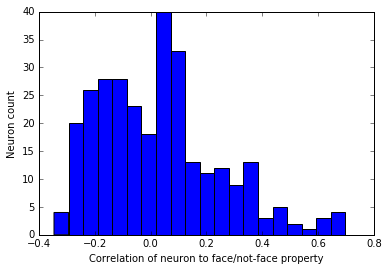

In [499]:
#let's broaden ourselves to looking at comparisons to more than just ... Cars

category = Ventral_Dataset['image_meta']['category'][:]
var_level = Ventral_Dataset['image_meta']['variation_level'][:]
v0v3_inds = ((var_level == 'V0') | (var_level == 'V3'))
Neural_Data_v0v3 = Neural_Data[v0v3_inds]  #now we're just subselected by variation, not by Cars/Faces only
category_v0v3 = category[v0v3_inds]
face_or_not_v0v3 = (category_v0v3 == 'Faces')

corr_facevsnot = np.array([stats.pearsonr(Neural_Data_v0v3[:, i], face_or_not_v0v3)[0] 
                      for i in range(Neural_Data_v0v3.shape[1])])
plt.hist(corr_facevsnot, bins=20)
plt.xlabel('Correlation of neuron to face/not-face property')
plt.ylabel('Neuron count')

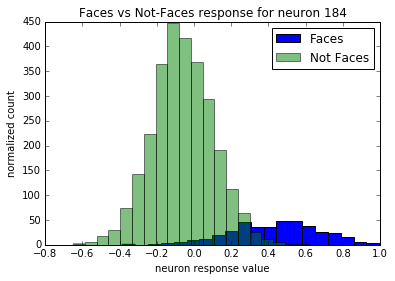

In [500]:
#Again, let's look at our best neuron

neurons_sorted_by_facevsnot_abscorrelation = np.abs(corr_facevsnot).argsort()
best_ind_facevsnot = neurons_sorted_by_facevscar_abscorrelation[-1]
most_corred_resp = Neural_Data_v0v3[:, best_ind_facevsnot]
hist_plot(most_corred_resp, face_or_not_v0v3, 'Faces', 'Not Faces')
plt.title('Faces vs Not-Faces response for neuron %d' % best_ind_facevsnot)

#now the distribution is much more skewed obviously
#but the best neuron for the just is still the same actually

In [501]:
threshold = .2
predicted_face = most_corred_resp > threshold
acc = fraction_correct(predicted_face, face_or_not_v0v3)
print('The percent correct is %.2f%%' % (acc * 100)) 

The percent correct is 93.16%


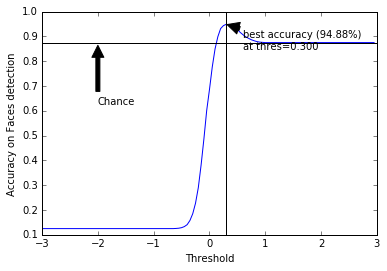

In [503]:
plot_threshold_acc(most_corred_resp, face_or_not_v0v3, 'Faces')

plt.axhline(7/8., color='k')
plt.annotate('Chance', xy=(-2, 7/8.), xytext=(-2, 5/8.), arrowprops=dict(facecolor='black', shrink=0.05))
#hm -- couple of things
#  (1) the best threshold is no longer the middle between the means
#  (2) the level of chance is much higher now, so the raw performance is not that meaningful
#   ... see end of this notebook for detailed treatment of item (1)
#   ... item (2) will be solved in part by other metrics we'll look at in a bit

## Minimum Distance Classifiers

In [504]:
#ok So let's work with all 8 categories
categories = Ventral_Dataset['image_meta']['category'][:]   #array of category labels for all images  --> shape == (5760,)
unique_categories = np.unique(categories)                #array of unique category labels --> shape == (8,)


In [506]:
len(unique_categories)

8

In [507]:
#Now, the core idea of the minimum distance classifier is to 
#   look at distances to means of (neural) features for each category
#   so let's compute the neural feature means for the 8 categories here
category_means = np.array([Neural_Data_v0v3[category_v0v3 == c].mean(0)
                           for c in unique_categories])

In [508]:
#As expected, this is an array with shape (num_categories, num_neurons)
category_means.shape

(8, 296)

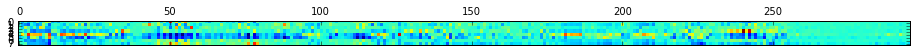

In [509]:
#let's visualize it
plt.matshow(category_means)

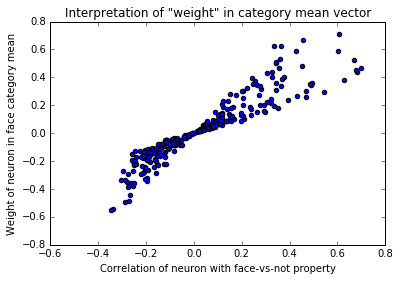

In [510]:
#actually we can interpret the relationship between these values
#and the single-neuron stuff we saw earlier .... 
plt.scatter(corr_facevsnot, category_means[4])
plt.xlabel('Correlation of neuron with face-vs-not property')
plt.ylabel('Weight of neuron in face category mean')
plt.title('Interpretation of "weight" in category mean vector')

#the value of the average response for neuron i in category j is highly correlated
#with the per-neuron correlation to the j-vs-not-j property

In [511]:
#With this in mind, we can construct a simple euclidean-distance classifier

def distance_classifier(x, means, ucats):
    """Arguments:
         x = new example of data -- of shape N (where N = number of neurons)
         means = matrix of means of each neuron for each category, 
                 of shape (M, N), where M = number of categories
         ucats = vector of category labels (of length M)
       Returns: prediction for x based on minimum distance to category means
    """
    #compute the distances between x and each mean
    distances = ((x - means)**2).sum(1)  #this is a length M vector
    #find the index of the category with the smallest distance
    predicted_category_ind = distances.argmin()    
    #get the category corresponding to that index
    predicted_category = ucats[predicted_category_ind]
    return predicted_category

In [521]:
#now let's apply this classifier to cars vs faces  

carface_category_means = category_means[[2, 4]]  #since Cars and Faces were the 2nd and 4th categories, respecitvely
predictions = []
#loop over the neural responses to each stimulus
for resp in Neural_Data_subset:
    #get the predictions for each stimulus
    pred = distance_classifier(resp, 
                               carface_category_means, 
                               ['Cars', 'Faces'])
    #add to the list of predictions
    predictions.append(pred)
#make it a numpy array
predictions = np.array(predictions)

#see how accurate the predictions are
pct = fraction_correct(predictions, category[subset_inds])

print('Distance classifier accuracy on Cars / Faces (V0/V3): %.2f%%' % (100*pct))

#ok, so this population classifier is slightly better than what we measured for 
#the best single neuron before (which was ~87%)

Distance classifier accuracy on Cars / Faces (V0/V3): 90.88%


In [522]:
def get_confusion_matrix(predicted, actual, ucats):
    """Gets confusion matrix where 
           mat[i, j] = number of instances where 
                 actual = category i and 
                 predicted = category j
    """
    cmat = []
    for a_cat in ucats:
        cvec = []
        for p_cat in ucats:
            rate = ((predicted == p_cat) & (actual == a_cat)).sum()
            cvec.append(rate)
        cmat.append(cvec)
    return np.array(cmat)

def visualize_confmat(cmat, ucats, fig=None):
    cmat = cmat.astype(float) / cmat.sum(0)
    if fig is None:
        plt.matshow(cmat)
    else:
        fig.gca().matshow(cmat)
    for i in range(cmat.shape[0]):
        for j in range(cmat.shape[1]):
            plt.text(j-.1, i, '%.2f%%' % (cmat[i, j] * 100), color='w')
    M = len(ucats)
    plt.xticks(np.arange(M), ucats)
    plt.yticks(np.arange(M), ucats)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

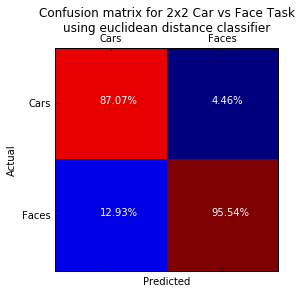

In [523]:
cmat = get_confusion_matrix(predictions, 
                     category[subset_inds], 
                     ['Cars', 'Faces'])
visualize_confmat(cmat, ['Cars', 'Faces'])
plt.title('Confusion matrix for 2x2 Car vs Face Task\nusing euclidean distance classifier')

#Upper right: True Positives
#Lower Right: True Negatives
#Upper Left: False Negatives
#Lower Left: False Positives

In [524]:
#But now we can do the same for 8-way classification
predictions = np.array([distance_classifier(resp, 
                                           category_means,
                                           unique_categories)
                          for resp in Neural_Data_v0v3])

pct = fraction_correct(predictions, category_v0v3)

print('Distance classifier accuracy on 8-way classification (V0/V3): %.2f%%' % (100*pct))

#this is way above chance -- recall, chance is 1/8 = 12.5% for this 8-way task

Distance classifier accuracy on 8-way classification (V0/V3): 62.28%


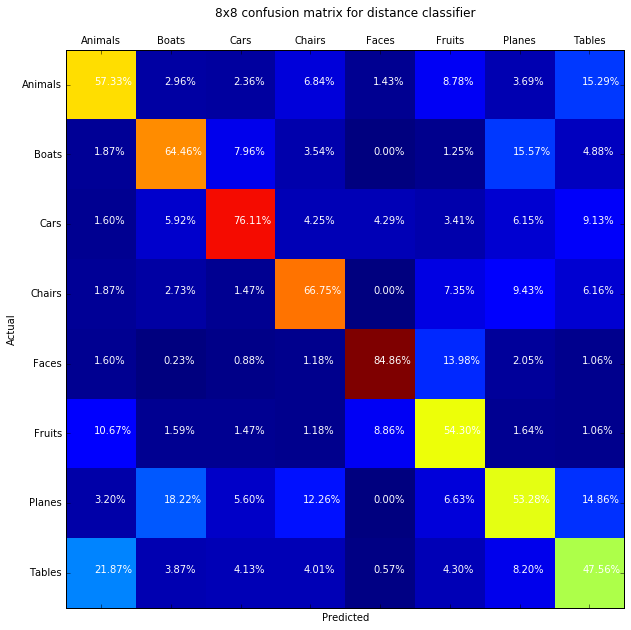

In [525]:
#let's have a look at the 8x8 confusion matrix
cmat = get_confusion_matrix(predictions, 
                            category_v0v3, 
                            unique_categories)
fig = plt.figure(figsize=(10, 10))
visualize_confmat(cmat, unique_categories, fig=fig)
plt.title('8x8 confusion matrix for distance classifier')

## Maximum Correlation classifiers

In [526]:
def correlation_classifier(x, means, ucats):
    """Arguments:
         x = new example of data -- of shape N (where N = number of neurons)
         means = matrix of means of each neuron for each category, 
                 of shape (M, N), where M = number of categories
         ucats = vector of category labels (of length M)
       Returns: prediction for x based on maximum correlation with category means
    """
    #get the correlations
    correlations = [stats.pearsonr(x, m)[0] for m in means]
    #find the index with highest correlation
    predicted_category_ind = np.argmax(correlations)
    #get the category with that index
    predicted_category = ucats[predicted_category_ind]
    return predicted_category

In [527]:
#let's test our correlation classifier on the same car/face binary classification from above
prediction = [correlation_classifier(resp, 
                                     carface_category_means,
                                     ['Cars', 'Faces'])
                        for resp in Neural_Data_subset]
pct = fraction_correct(prediction, category[subset_inds])

print('Correlation classifier accuracy on Cars / Faces (V0/V3): %.2f%%' % (100*pct))

#ok, so this population classifier is in turn slightly better than the distance
#classifier (which was ~91%)


Correlation classifier accuracy on Cars / Faces (V0/V3): 93.75%


In [528]:
#And now, our correlation classifier on the 8-way task
prediction = np.array([correlation_classifier(resp, category_means, unique_categories)
                          for resp in Neural_Data_v0v3])
pct = fraction_correct(prediction, category_v0v3)

print('Correlation classifier accuracy on 8-way classification (V0/V3): %.2f%%' % (100*pct))

#again, somewhat better than the distance classifier (62.28%) ... but a bit slow!

Correlation classifier accuracy on 8-way classification (V0/V3): 65.34%


In [529]:
def norm(data):
    """perform a whitening-like normalization operation on the data, feature-wise
       Assumes data = (K, M) matrix where K = number of stimuli and M = number of features
    """
    data = data - data.mean(0)  #subtract the feature-wise mean of the data
    data = data / np.maximum(data.std(0), 1e-5)  #divide by the feature-wise std of the data
    return data

Neural_Data_v0v3_normed = norm(Neural_Data_v0v3) #normed over all V0-V3 images

In [530]:
#See, the means are essentially 0.0 (up to numerical noise)
print('Means:', Neural_Data_v0v3_normed.mean(0)[:10])
#and the stds are essentially 1.0 (up to numerical noise)
print('Stds:', Neural_Data_v0v3_normed.std(0)[:10])

('Means:', array([ -1.22562049e-08,   3.53017811e-08,   4.32133662e-09,
         1.00843607e-07,  -3.80398717e-08,  -5.40819016e-08,
         4.52622757e-08,  -3.01189722e-08,   5.65499079e-08,
         2.12900346e-08], dtype=float32))
('Stds:', array([ 1.00000072,  1.00000024,  0.99999928,  0.99999934,  0.9999997 ,
        1.00000036,  1.00000012,  0.99999958,  1.00000048,  0.99999982], dtype=float32))


In [531]:
category_means_normed = np.array([Neural_Data_v0v3_normed[category_v0v3 == c].mean(0) 
                                  for c in unique_categories])

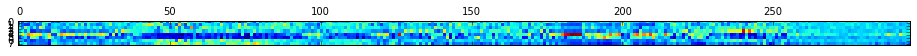

In [532]:
#the patterns look starker here than they did in the un-normed case
plt.matshow(category_means_normed)

In [533]:
prediction = [correlation_classifier(resp, 
                                     category_means_normed, 
                                     unique_categories)
                          for resp in Neural_Data_v0v3_normed]

pct = fraction_correct(prediction, category_v0v3)
print('Normed Correlation classifier accuracy on 8-way classification'
      '(V0/V3): %.2f%%' % (100*pct))

#... and in fact, norming seemes to help a little (compared to ~65% from un-normed case)

Normed Correlation classifier accuracy on 8-way classification(V0/V3): 68.44%


In [535]:
#This is a faster and more general version of all the distance-based classifiers
# ... this relies on the "cdist" function from scipy.spatial.distance:
#        https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
#Not only is this code much faster than above, it also covers both the euclidean AND the 
#correlation cases... and potentially others too if you want to try them

from scipy.spatial.distance import cdist
def minimum_distance_classifier_fast(X, means, ucats, metric='euclidean'):
    """Arguments:
         X = array of examples of data -- of shape (K, N) where K = number of examples
             and N = number of neurons
         means = matrix of means of each neuron for each category, 
                 of shape (M, N), where M = number of categories
         ucats = vector of category labels (of length M)
         metric = which metric to compute based on (possibilities are described in)
             https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html#scipy.spatial.distance.cdist
       Returns: prediction for x based on minimum distance to category means for 
                requested meric
    """
    #use the cdist function to get a (K, M) distance matrix, with one row for each stimulus
    #  and one column for each category
    dists = cdist(X, means, metric=metric) #<-- this matrix is (K, M) in shape
    #get the length-K vector of indices of minimum-distance categories
    min_dist_inds = dists.argmin(axis=1)   #<-- this is a length-K vector of integers
    #return the category predictions
    return ucats[min_dist_inds]

In [580]:
#ok let's test the new classifier 

predictions = minimum_distance_classifier_fast(Neural_Data_v0v3_normed, 
                                      category_means_normed, 
                                      unique_categories,
                                      metric='correlation')

pct = fraction_correct(predictions, category_v0v3)
print('Normed Correlation classifier accuracy on 8-way classification'
      '(V0/V3): %.2f%%' % (100*pct))

#see same result as before, but much faster!

Normed Correlation classifier accuracy on 8-way classification(V0/V3): 68.44%


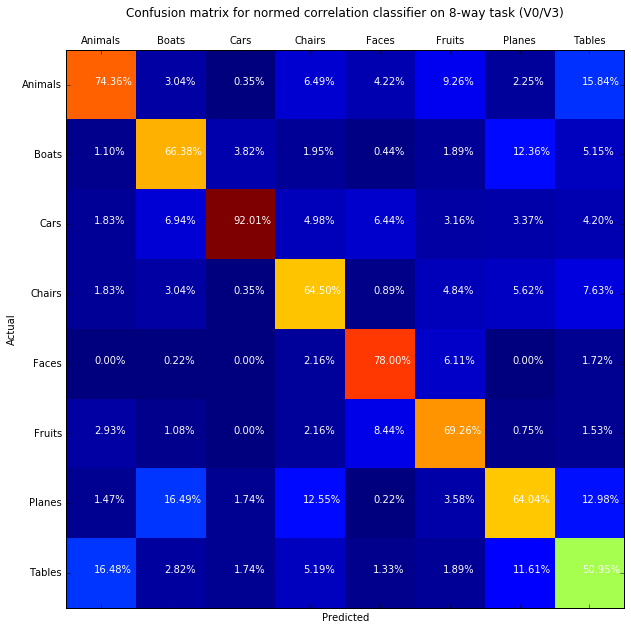

In [581]:
cmat = get_confusion_matrix(predictions, 
                            category_v0v3, 
                            unique_categories)
fig = plt.figure(figsize=(10, 10))
visualize_confmat(cmat, unique_categories, fig=fig)
plt.title('Confusion matrix for normed correlation classifier on 8-way task (V0/V3)')

### Simple RDM / Classifier comparison

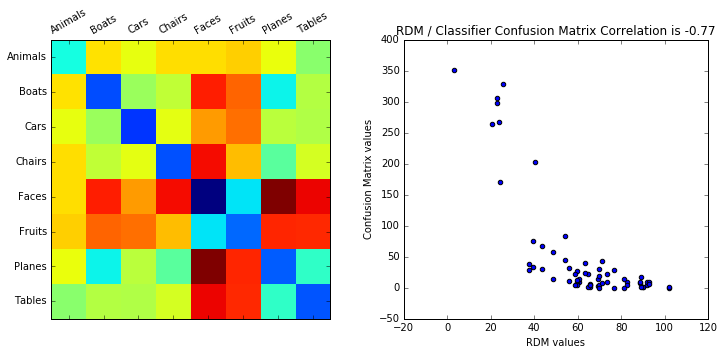

In [604]:
#It's interesting to compare the results from these classifiers to 
#RDMs generated by the underlying features
#so let's get the object-wise RDM for the data condition used to make the confusion matrix above (var0 and var3)
object_means_by_category_var0var3 = np.row_stack([[Neural_Data[(objects == o) & 
                                                    ((var_level == 'V3') | (var_level == 'V0'))].mean(0) 
                                                                for o in objects_by_category[c]]
                                                                for c in unique_categories])
rdm_object_means_by_category_var0var3 = 1 - np.corrcoef(object_means_by_category_var0var3)

#this object-wise RDM is 64x64, but we want to comapre to an 8x8 confusion matrix
#so let's collapse the RDM grouping objects within category and then compre
collapsed = np.array([[rdm_object_means_by_category_var0var3[8*i:8*(i+1), 8*j:8*(j+1)].sum()
                       for j in range(8)] for i in range(8)])

fig = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
fig.gca().matshow(collapsed)
plt.xticks(range(8), unique_categories, rotation=30)
plt.yticks(range(8), unique_categories)
plt.subplot(1, 2, 2)
plt.scatter(collapsed.ravel(), cmat.ravel())
corrval = stats.pearsonr(collapsed.ravel(), cmat.ravel())[0]
plt.xlabel('RDM values')
plt.ylabel('Confusion Matrix values')
plt.title('RDM / Classifier Confusion Matrix Correlation is %.2f' % corrval)

#ok, the collapsed RDM elements correlate pretty well with the confusion matrix
#.... btw the correlation is expected to be negative since the RDM is a "dissimilarity" matrix

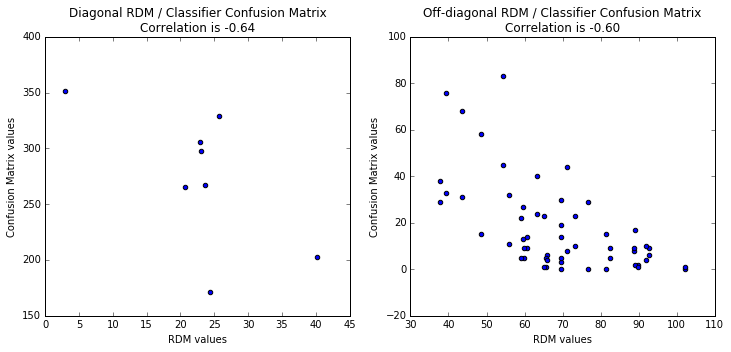

In [605]:
#but this is a little unfair, since we're looking at both diagonal and off diagonal elements simultaneously
#let's separate them

fig = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
diagonal_rdm = collapsed.diagonal()
diagonal_confmat = cmat.diagonal()
plt.scatter(diagonal_rdm, diagonal_confmat)
corrval = stats.pearsonr(diagonal_rdm, diagonal_confmat)[0]
plt.xlabel('RDM values')
plt.ylabel('Confusion Matrix values')
plt.title('Diagonal RDM / Classifier Confusion Matrix\nCorrelation is %.2f' % corrval)

plt.subplot(1, 2, 2)
inds0, inds1 = np.triu_indices(8, 1)
inds2, inds3 = np.tril_indices(8, -1)
off_diagonal_rdm = np.concatenate([collapsed[inds0, inds1], collapsed[inds2, inds3]])
off_diagonal_confmat = np.concatenate([cmat[inds0, inds1], cmat[inds2, inds3]])
plt.scatter(off_diagonal_rdm, off_diagonal_confmat)
corrval = stats.pearsonr(off_diagonal_rdm, off_diagonal_confmat)[0]
plt.xlabel('RDM values')
plt.ylabel('Confusion Matrix values')
plt.title('Off-diagonal RDM / Classifier Confusion Matrix\nCorrelation is %.2f' % corrval)

#both are a bit lower than the all-values comparison but still not bad

## Other performance metrics

In [237]:
def dprime_from_rates(tpr, far, clip=5):
    """Computes the formula
          Z(true positive rate) - Z(false alarm rate)
        where Z = inverse of the CDF of the gaussian
    """
    posppf = np.clip(stats.norm.ppf(tpr), -clip, clip)
    negppf = np.clip(stats.norm.ppf(far), -clip, clip)
    return posppf - negppf


def dprime_binary(predicted, actual, clip=5):
    """Assumes predicted, actual binary (0, 1)-valued vectors -- 
       the positive class value is "1" while the negative class is "0"
    """
    total_positives = (actual == 1).sum()
    true_positives = ((predicted == 1) & (actual == 1)).sum()
    true_positive_rate = true_positives / float(total_positives)
    total_negatives = (actual == 0).sum()
    false_alarms = ((predicted == 1) & (actual == 0)).sum()
    false_alarm_rate = false_alarms / float(total_negatives)
    return dprime_from_rates(true_positive_rate, false_alarm_rate, clip=clip)


def confusion_matrix_stats(cmat):
    """get generalized statistics from confusion matrix
       arguments: confusion matrix of shape (M, M) where M = number of categories
                   rows are actual, columns are predicted
       returns:
          len-M vectors of 
            total positives (P)
            total negavites (N)
            true positives (TP)
            true negatives (TN)
            false positives (FP)
            false nevatives (FN)
    """
    M = cmat.shape[0]
    TP = []
    FN = []
    FP = []
    TN = []
    for i in range(M):
        tp = cmat[i, i]                  #true positives are the diagonal element
        fp = cmat[:, i].sum() - tp       #false positives are column sum - diagonal
        fn = cmat[i].sum() - tp          #false negatives are row sum - diagonal
        tn = cmat.sum() - fp - fn - tp   #true negatives are everything else
        TP.append(tp)
        FN.append(fn)
        FP.append(fp)
        TN.append(tn)
    TP = np.array(TP)
    FN = np.array(FN)
    FP = np.array(FP)
    TN = np.array(TN)
    P = TP + FN    #total positives are true positives + false negatives
    N = TN + FP    #total negatives are true negatives + false positives
    return P, N, TP, TN, FP, FN
    
    
def balanced_accuracy(confmat):
    """Computes balanced accuracy (see http://mvpa.blogspot.com/2015/12/balanced-accuracy-what-and-why.html)
       from confusion matrix 
    """
    P, N, TP, TN, FP, FN = confusion_matrix_stats(confmat)
    sensitivity = TP / P.astype(float)
    specificity = TN / N.astype(float)
    balanced_acc = (sensitivity + specificity) / 2.
    return balanced_acc
    

def dprime_confmat(cmat, clip=5):
    """Computes vector of dprimes from confusion matrix
    """
    P, N, TP, TN, FP, FN = confusion_matrix_stats(cmat)
    TPR = TP / P.astype(float)
    FPR = FP / N.astype(float)
    return dprime_from_rates(TPR, FPR, clip=clip)


def accuracy_confmat(cmat):
    correct = cmat.diagonal().sum()
    total = cmat.sum()
    return correct / float(total)

In [91]:
balanced_accuracy(cmat)

array([ 0.74125   ,  0.85482143,  0.82714286,  0.84321429,  0.92107143,
        0.88517857,  0.69660714,  0.78785714])

In [89]:
dprime_confmat(cmat)

array([ 1.9787648 ,  2.31746989,  2.81854848,  2.22571721,  2.96988777,
        2.54935674,  1.63849053,  1.76285901])

### Comparison of  V4 and IT

In [538]:
#let's get some data
IT_Neural_Data_v0v3_normed = Neural_Data_v0v3_normed[:, IT_NEURONS]
V4_Neural_Data_v0v3_normed = Neural_Data_v0v3_normed[:, V4_NEURONS]

category_means_normed_IT = category_means_normed[:, IT_NEURONS]
category_means_normed_V4 = category_means_normed[:, V4_NEURONS]

In [539]:
#Ok, how does the performance go if we only look at IT neurons?
predictions = minimum_distance_classifier_fast(IT_Neural_Data_v0v3_normed, 
                                      category_means_normed_IT, 
                                      unique_categories,
                                      metric='correlation')

pct = fraction_correct(predictions, category_v0v3)
print('Normed Correlation classifier accuracy from IT on 8-way classification'
      '(V0/V3): %.2f%%' % (100*pct))

#so compared to having all 296 neurons, almost no performance drop just by looking at IT

Normed Correlation classifier accuracy from IT on 8-way classification(V0/V3): 68.53%


In [540]:
#what about V4 neurons only?
predictions = minimum_distance_classifier_fast(V4_Neural_Data_v0v3_normed, 
                                      category_means_normed_V4, 
                                      unique_categories,
                                      metric='correlation')

pct = fraction_correct(predictions, category_v0v3)
print('Normed Correlation classifier accuracy from V4 on 8-way classification'
      '(V0/V3): %.2f%%' % (100*pct))

#however, looking only at V4 neurons does lead to an apparently substantial performance drop

Normed Correlation classifier accuracy from V4 on 8-way classification(V0/V3): 42.81%


In [541]:
#actually, to be fair in our comparison of IT to V4 we need to equalize the number of 
#neurons on which we build the classifiers.  There are more IT neurons in the dataset (168)
#than there are V4 neurons (128).  So let's subsample 128 IT neurons. 
#Of course, to do this properly we should subsample a bunch of times. 

def subsample_IT_and_check_performance(K):
    fair_number_of_neurons = min(len(IT_NEURONS), len(V4_NEURONS))
    rng = np.random.RandomState(seed=0)
    pcts = []
    for sample_num in range(K):
        perm = rng.permutation(len(IT_NEURONS))
        IT_Neural_Data_v0v3_normed_subsample = IT_Neural_Data_v0v3_normed[:, 
                                                        perm[:fair_number_of_neurons]]
        category_means_normed_IT_subsample = category_means_normed_IT[:, 
                                                        perm[:fair_number_of_neurons]]

        predictions = minimum_distance_classifier_fast(IT_Neural_Data_v0v3_normed_subsample, 
                                              category_means_normed_IT_subsample, 
                                              unique_categories,
                                              metric='correlation')

        pct = fraction_correct(predictions, category_v0v3)
        pcts.append(pct)
    return pcts
        
#let's do the subsampling 100 times (it's a good thing we have a fast classifier!)
pcts = subsample_IT_and_check_performance(100)
    
print('Normed Correlation classifier accuracy from %d-neuron IT subsample on '
      '8-way classification (V0/V3): %.2f%% (mean) %.2f%% (std)' % (fair_number_of_neurons, 
                                                100*np.mean(pcts),
                                                100*np.std(pcts)))

#ok, so still way better than 128 V4 neurons -- so the performance improvement in IT is probably NOT because there are more IT neurons
#in the sample.

Normed Correlation classifier accuracy from 128-neuron IT subsample on 8-way classification (V0/V3): 67.71% (mean) 0.83% (std)


In [542]:
#let's look at where the weights come from in the classifier
def weightfunc(x):
    return (x - x.mean(1)[:, np.newaxis]) / (x.std(1)[:, np.newaxis])

abs_weights = np.abs(weightfunc(category_means_normed))

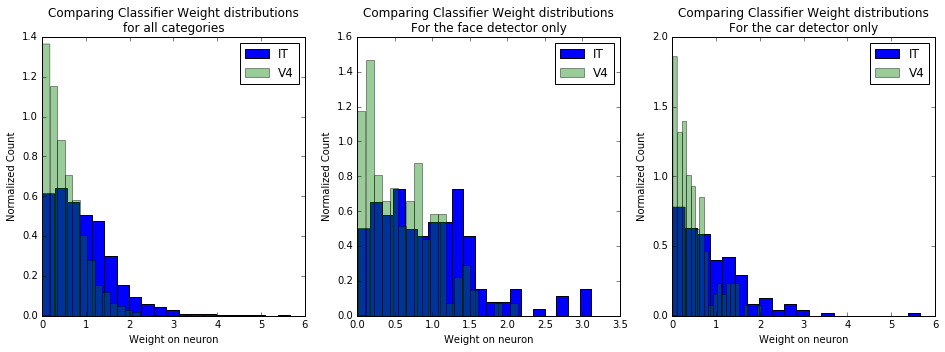

In [543]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
l0 = plt.hist(abs_weights[:, IT_NEURONS].ravel(), bins=20, normed=True)
l1 = plt.hist(abs_weights[:, V4_NEURONS].ravel(), bins=20, normed=True, alpha=.4)
plt.legend([l0[2][0], l1[2][0]], ['IT', 'V4'])
plt.title('Comparing Classifier Weight distributions\nfor all categories')
plt.xlabel('Weight on neuron')
plt.ylabel('Normalized Count')

plt.subplot(1, 3, 2)
l0 = plt.hist(abs_weights[:, IT_NEURONS][4], bins=20, normed=True)
l1 = plt.hist(abs_weights[:, V4_NEURONS][4], bins=20, normed=True, alpha=.4)
plt.legend([l0[2][0], l1[2][0]], ['IT', 'V4'])
plt.title('Comparing Classifier Weight distributions\nFor the face detector only')
plt.xlabel('Weight on neuron')
plt.ylabel('Normalized Count')

plt.subplot(1, 3, 3)
l0 = plt.hist(abs_weights[:, IT_NEURONS][2], bins=20, normed=True)
l1 = plt.hist(abs_weights[:, V4_NEURONS][2], bins=20, normed=True, alpha=.4)
plt.legend([l0[2][0], l1[2][0]], ['IT', 'V4'])
plt.title('Comparing Classifier Weight distributions\nFor the car detector only')
plt.xlabel('Weight on neuron')
plt.ylabel('Normalized Count')

#so IT units are substantially heigher weighted by the classifier

## Getting Splits for Cross Validation

In [544]:
def get_splits(metadata,
               split_by_func,
               num_splits,
               num_per_class_test,
               num_per_class_train,
               train_filter=None,
               test_filter=None,
               seed=0):
    """
    construct a consistent set of splits for cross validation
    
    arguments: 
        metadata: numpy.rec.array of metadata 
        split_by_func: callable, returns label for spliting data into balanced categories 
                       when applied to metadata
        num_per_class_test: number of testing examples for each unique split_by category
        num_per_class_train: number of train examples for each unique split_by category
        train_filter: callable (or None): specifying which subset of the data to use in training
                       applied on a per-element basis to metadata
        test_filter: callable (or None): specifying which subset of the data to use in testing
                       applied on a per-element basis to metadata
        seed: seed for random number generator
    """
    
    #define helper function for filtering metadata by desired filter
    def get_possible_inds(metadata, filter):
        inds = np.arange(len(metadata))
        if filter is not None:
            subset = np.array(map(filter, metadata)).astype(np.bool)
            inds = inds[subset]
        return inds
    
    #filter the data by train and test filters
    train_inds = get_possible_inds(metadata, train_filter)
    test_inds = get_possible_inds(metadata, test_filter)
    
    #construct possibly category labels for balancing data
    labels = split_by_func(metadata)
    #for later convenience, get unique values of splitting labels in train and test data
    unique_train_labels = np.unique(labels[train_inds])
    unique_test_labels = np.unique(labels[test_inds])
    
    #seed the random number generator
    rng = np.random.RandomState(seed=seed)
    
    #construct the splits one by one
    splits = []
    for _split_ind in range(num_splits):
        #first construct the testing data
        actual_test_inds = []
        #for each possible test label
        for label in unique_test_labels: 
            #look at all possible stimuli with this label
            possible_test_inds_this_label = test_inds[labels[test_inds] == label]
            #count how many there are
            num_possible_test_inds_this_label = len(possible_test_inds_this_label)
            #make sure there are enough
            assert num_possible_test_inds_this_label >= num_per_class_test, 'You requested %s per test class but there are only %d available' % (num_per_class_test,
                                                                                      num_possible_test_inds_this_label)
            #select num_per_class_test random examples
            perm = rng.permutation(num_possible_test_inds_this_label)
            actual_test_inds_this_label = possible_test_inds_this_label[perm[ :num_per_class_test]]
            actual_test_inds.extend(actual_test_inds_this_label)
        actual_test_inds = np.sort(actual_test_inds)
        
        #now, since the pools of possible train and test data overlap, 
        #but since we don't want the actual train and data examples to overlap at all,
        #remove the chosen test examples for this split from the pool of possible train examples for this split
        remaining_available_train_inds = np.unique(list(set(train_inds).difference(actual_test_inds)))
        
        #now contruct the train portion of the split
        #basically the same way as for the testing examples
        actual_train_inds = []
        for label in unique_train_labels:
            _this_label = labels[remaining_available_train_inds] == label
            possible_train_inds_this_label = remaining_available_train_inds[_this_label]
            num_possible_train_inds_this_label = len(possible_train_inds_this_label)
            assert num_possible_train_inds_this_label >= num_per_class_train, 'You requested %s per train class but there are only %d available' % (num_per_class_train,
                                                                                       num_possible_train_inds_this_label)
            perm = rng.permutation(num_possible_train_inds_this_label)
            actual_train_inds_this_label = possible_train_inds_this_label[perm[ :num_per_class_train]]
            actual_train_inds.extend(actual_train_inds_this_label)
        actual_train_inds = np.sort(actual_train_inds)
        
        split = {'train': actual_train_inds, 'test': actual_test_inds}
        splits.append(split)
        
    return splits
        
    

In [198]:
#use numpy recarray object to store metadata 
meta_array = np.core.records.fromarrays(Ventral_Dataset['image_meta'].values(),
                                        names=Ventral_Dataset['image_meta'].keys())

meta_array.dtype

dtype((numpy.record, [(u'category', 'S7'), (u'object_name', 'S24'), (u'rotation_xy', '<f8'), (u'rotation_xz', '<f8'), (u'rotation_yz', '<f8'), (u'size', '<f8'), (u'translation_y', '<f8'), (u'translation_z', '<f8'), (u'variation_level', 'S2')]))

In [545]:
meta_array

rec.array([ ('Fruits', 'Apple_Fruit_obj',   -0.   ,   0.   ,  -0.   ,  0.81   ,  0.   ,  0.   , 'V0'),
           ('Fruits', 'Apple_Fruit_obj',   -0.   ,   0.   ,  -0.   ,  0.81   ,  0.   ,  0.   , 'V0'),
           ('Fruits', 'Apple_Fruit_obj',   -0.   ,   0.   ,  -0.   ,  0.81   ,  0.   ,  0.   , 'V0'),
           ...,
           ('Cars', 'z3',  154.361, -86.072,  38.988,  1.64492, -0.283,  0.244, 'V6'),
           ('Cars', 'z3',   38.006, -86.882,  51.389,  1.22602, -0.014,  0.402, 'V6'),
           ('Cars', 'z3',  101.54 , -87.958,  79.689,  1.0325 ,  0.145, -0.072, 'V6')], 
          dtype=[(u'category', 'S7'), (u'object_name', 'S24'), (u'rotation_xy', '<f8'), (u'rotation_xz', '<f8'), (u'rotation_yz', '<f8'), (u'size', '<f8'), (u'translation_y', '<f8'), (u'translation_z', '<f8'), (u'variation_level', 'S2')])

In [546]:
splits = get_splits(meta_array, 
                    lambda x: x['object_name'],  #we're balancing splits by object
                    10,  #10 total splits
                    10,  #with 10 testing 
                    40,  #and 40 training examples per object
                    train_filter=lambda x: x['variation_level'] in ['V3', 'V6'], #keeping only V3 and V6 stimuli in training
                    test_filter=lambda x: x['variation_level'] in ['V0'], #testing only on V0 stimuli
                   )

In [547]:
#there should be 10 splits
len(splits)
#ok

10

In [548]:
#each split should have train and test components
splits[0].keys()
#ok

['test', 'train']

In [549]:
#each training split should have 40 * 64 = 2560 images
splits[0]['train'].shape
#ok

(2560,)

In [550]:
#each testing split should have 10 * 64 = 640 images
splits[0]['test'].shape
#ok

(640,)

In [551]:
#only variation V3 and V6 images should appear in training data
train_meta = meta_array[splits[0]['train']]
np.unique(train_meta['variation_level'])
#ok

array(['V3', 'V6'],
      dtype='|S2')

In [552]:
#only variation V0 images should appear in testing data
test_meta = meta_array[splits[0]['test']]
np.unique(test_meta['variation_level'])
#ok

array(['V0'],
      dtype='|S2')

In [553]:
splits = get_splits(meta_array, 
                    lambda x: x['object_name'],  #we're balancing splits by object
                    10,  #10 total splits
                    100,  #with 100 testing 
                    40,  #and 40 training examples per object
                    train_filter=lambda x: x['variation_level'] in ['V3', 'V6'], #keeping on V3 and V6 stimuli in training
                    test_filter=lambda x: x['variation_level'] in ['V0'], #testing on V0 stimuli
                   )
#error since asked for too many testing images per class

AssertionError: You requested 100 per test class but there are only 10 available

In [554]:
splits = get_splits(meta_array, 
                    lambda x: x['object_name'],  #we're balancing splits by object
                    10,  #10 total splits
                    50,  #with 50 testing 
                    50,  #and 50 training examples per object
                    train_filter=lambda x: x['variation_level'] in ['V3', 'V6'], #keeping on V3 and V6 stimuli in training
                    test_filter=lambda x: x['variation_level'] in ['V3', 'V6'], #also testing on V3 and V6
                   )
#again, too many testing images per class since there are only 80 total V3 and V6 
#... and the training/testing splits cannot overlap

AssertionError: You requested 50 per train class but there are only 30 available

In [555]:
splits = get_splits(meta_array, 
                    lambda x: x['object_name'],  #we're balancing splits by object
                    10,  #10 total splits
                    40,  #with 40 testing 
                    40,  #and 40 training examples per object
                    train_filter=lambda x: x['variation_level'] in ['V3', 'V6'], #keeping on V3 and V6 stimuli in training
                    test_filter=lambda x: x['variation_level'] in ['V3', 'V6'], #also testing on V3 and V6
                   )
#ok this time we're fine

In [556]:
#each training and testing split should have 40 * 64 = 2560 images
print(splits[0]['train'].shape, 
      splits[0]['test'].shape)
#ok

((2560,), (2560,))


In [557]:
#training and testing splits better not overlap
set(splits[0]['train']).intersection(splits[0]['test'])
#... phew

set()

In [558]:
splits = get_splits(meta_array, 
                    lambda x: x['category'],  #we're balancing splits by category now
                    10,  #10 total splits
                    160,  #with 160 testing 
                    160,  #and 160 training examples per category
                    train_filter=lambda x: x['variation_level'] in ['V3', 'V6'], #keeping on V3 and V6 stimuli in training
                    test_filter=lambda x: x['variation_level'] in ['V3', 'V6'], #also testing on V3 and V6
                   )

#we might not have balance across objects any more, since we split by category

## The Train-Test Procedure

In [559]:
class MinimumDistanceClassifier(object):
    """
    Codification of generic minimum distance classifier in a scikit-learn friendly format.
    """
    def __init__(self, labelset, n_features, fnorm=False, metric='correlation'):
        """
        Arguments: 
            labelset -- list of unique values the classifier can have
            n_features -- how many features will be trained/tested
            fnorm -- whether to do featurewise normalization or not
            metric -- what distance metric to use (consistent with scipy.spatial.distance.cdist)
        """
        assert labelset.ndim == 1, 'The labelset can only have one dimension'
        assert len(labelset) == len(np.unique(labelset)), 'The labelset must be a unique list of elements'
        self.labelset = labelset
        self.n_classes = len(labelset)
        self.n_features = n_features
        self.fnorm = fnorm
        self.metric = metric

    def initialize(self, val=None, n=None):
        self._mu = np.zeros((self.n_classes, self.n_features))
        self._n_samples = np.zeros((self.n_classes,)).astype(np.int)
        if val is not None:
            assert val.shape == self.mu.shape
            assert n.dtype == self._n_samples.dtype
            assert n.shape == self._n_samples.shape
            assert (n >= 0).all()
            self._mu += val
            self._n_samples += n

    def fit(self, X, y):
        self.initialize(val=None, n=None)
        if self.fnorm:
            self.fmean = X.mean(axis=0)
            X = X - self.fmean
            self.fvar = X.std(axis=0)
            X = X / np.maximum(self.fvar, 1e-6)
        self.partial_fit(X, y)

    def partial_fit(self, X, y, safe=True):
        assert X.ndim == 2
        assert y.ndim == 1
        assert X.shape == (len(y), self.n_features), (X.shape, (len(y), self.n_features))
        assert set(y) <= set(self.labelset), (set(y), set(self.labelset))
        if safe:
            uy = np.unique(y)
            assert (uy == self.labelset).all()
        for vi, v in enumerate(self.labelset):
            Xv = X[y == v]
            nv = float(Xv.shape[0])
            if nv > 0:
                Xvm = Xv.mean(0)
                ns = self._n_samples[vi]
                self._mu[vi] = (ns / (ns + nv)) * self._mu[vi] + (nv / (ns + nv)) * Xvm
                self._n_samples[vi] += int(nv)

    @property
    def coef_(self):
        c = self._mu
        return c

    @property
    def weights(self):
        c = self.coef_
        def weightfunc(x):
            return (x - x.mean(1)[:, np.newaxis]) / (x.std(1)[:, np.newaxis])
        return weightfunc(c)

    def decision_function(self, X):
        if self.fnorm:
            X = X - self.fmean
            X = X / np.maximum(self.fvar, 1e-6)
        return cdist(X, self.coef_, metric=self.metric)

    def predict(self, X):
        assert X.ndim == 2
        assert X.shape[1] == self.n_features
        decs = self.decision_function(X)
        return self.labelset[decs.argmin(1)]

In [560]:
def evaluate_results(confmats, labels):
    """Convenience function that summarize results over confusion matrices
       Arguments:
           confmats = array of shape (M, M, ns)  where M = number of categories
                      and ns = number of splits
                confmats[i, j, k] = number of times classifier predicted class j 
                                    when actual is class i, on split k 
           labels = length-M vector of category labels
           
       Returns: dictionary with useful summary metrics, including dprime,
                balanced accuracy, and percent correct (regular "accuracy")
                both for the split-mean confusion matrix, and separately across splits
                  
    """
    result = {}
    result['labels'] = labels
    result['confusion_matrices'] = confmats
    mean_confmat = confmats.mean(0)
    result['mean_dprime'] = dprime_confmat(mean_confmat)
    result['mean_balanced_accuracy'] = balanced_accuracy(mean_confmat)
    result['mean_accuracy'] = accuracy_confmat(mean_confmat)
    
    result['dprime_by_split'] = [dprime_confmat(c) for c in confmats]
    result['balanced_acc_by_split'] = [balanced_accuracy(c) for c in confmats]
    result['accuracy_by_split'] = [accuracy_confmat(c) for c in confmats]
    
    return result    
    
    
def train_and_test_correlation_classifier(features, labels, splits):
    """Routine for contructing, training and testing correlation classifier
       
       Arguments: 
           features: (K, M) feature array where K = number of stimuli and M = number of features
           labels: length-K vector of labels to be predicted
           splits: splits of data (constructed by calling the get_splits function)
           
       Returns:
           dictionary summary of training and testing results
    
    """
    ucats = np.unique(labels)
    train_confmats = []
    test_confmats = []
    for split in splits:
        model = MinimumDistanceClassifier(ucats,
                                          features.shape[1],
                                          fnorm=True,
                                          metric='correlation')
        
        train_inds = split['train']
        test_inds = split['test']
        
        train_features = features[train_inds]
        train_labels = labels[train_inds]
        model.fit(train_features, train_labels)
        
        train_predictions = model.predict(train_features)
        train_confmat = get_confusion_matrix(train_predictions, train_labels, ucats)
        train_confmats.append(train_confmat)
        
        test_features = features[test_inds]
        test_labels = labels[test_inds]
        
        test_predictions = model.predict(test_features)
        test_confmat = get_confusion_matrix(test_predictions, test_labels, ucats)
        test_confmats.append(test_confmat)
        
    train_confmats = np.array(train_confmats)
    train_results = evaluate_results(train_confmats, ucats)
    test_confmats = np.array(test_confmats)
    test_results = evaluate_results(test_confmats, ucats)
    results = {'train': train_results, 'test': test_results}
    return results
        

In [317]:
#OK let's test out our new machinery 
V4_Neural_Data = Neural_Data[:, V4_NEURONS]
IT_Neural_Data = Neural_Data[:, IT_NEURONS]

splits = get_splits(meta_array, 
                    lambda x: x['object_name'],  #we're balancing splits by object
                    10,  #10 total splits
                    20,  #with 20 testing 
                    20,  #and 20 trainin examples per object
                    train_filter=lambda x: x['variation_level'] in ['V3', 'V6'], #keeping on V3 and V6 stimuli in training
                    test_filter=lambda x: x['variation_level'] in ['V3', 'V6'], #in testing too
                   )

results_V4 = train_and_test_correlation_classifier(V4_Neural_Data, meta_array['category'], splits)
results_IT = train_and_test_correlation_classifier(IT_Neural_Data, meta_array['category'], splits)

print('Average test accuracy of V4 on 8-way categorization (V3 & V6) is %.2f%%' % (100*results_V4['test']['mean_accuracy']))
print('Average test accuracy of IT on 8-way categorization (V3 & V6) is %.2f%%' % (100*results_IT['test']['mean_accuracy']))

Average test accuracy of V4 on 8-way categorization (V3 & V6) is 28.19%
Average test accuracy of IT on 8-way categorization (V3 & V6) is 55.04%


In [561]:
#Ok let's flex our muscles a little and compute a training curve as a function of 
#number of training examples

train_curve_points = [2, 5, 10, 15, 20, 30, 40, 50, 60, 80, 160, 240, 320, 400, 480]
def get_category_training_curve(features):
    results = []
    for num_train in train_curve_points:
        splits = get_splits(meta_array, 
                    lambda x: x['category'], #now we're going to construct splits by *category* rather than object
                    20,  #20 splits each time
                    20 * 8,   #total of 20*8 = 160 testing examples per category
                    num_train,  #here's where the variable number of training examples comes in
                    train_filter=lambda x: x['variation_level'] in ['V3', 'V6'], #same filters as above
                    test_filter=lambda x: x['variation_level'] in ['V3', 'V6'])
        result = train_and_test_correlation_classifier(features, meta_array['category'], splits)
        results.append(result)
    return results

V4_curve = get_category_training_curve(V4_Neural_Data)
IT_curve = get_category_training_curve(IT_Neural_Data)

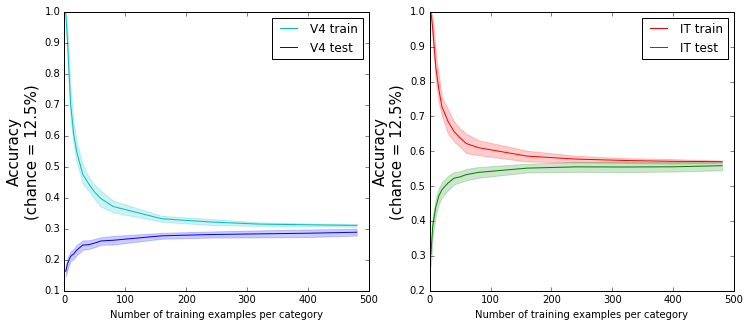

In [310]:
#Let's plot our results.
def plot_training_curve(curve_data, color1, color2):
    train_means = np.array([np.mean(r['train']['accuracy_by_split']) for r in curve_data])
    train_stds = np.array([np.std(r['train']['accuracy_by_split']) for r in curve_data])
    test_means = np.array([np.mean(r['test']['accuracy_by_split']) for r in curve_data])
    test_stds = np.array([np.std(r['test']['accuracy_by_split']) for r in curve_data])

    l1 = plt.plot(train_curve_points, train_means, color=color1)
    plt.fill_between(train_curve_points, 
                     train_means - train_stds, 
                     train_means + train_stds, 
                     color=color1,
                     alpha = 0.2)
    l2 = plt.plot(train_curve_points, test_means, color=color2)
    plt.fill_between(train_curve_points, 
                     test_means - test_stds, 
                     test_means + test_stds, 
                     color=color2,
                     alpha = 0.2)
    plt.xlabel('Number of training examples per category')
    plt.ylabel('Accuracy\n(chance = 12.5%)', fontsize=15)
    return l1, l2
    
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
l0, l1 = plot_training_curve(V4_curve, 'c', 'b')
plt.legend([l0[0], l1[0]], ['V4 train', 'V4 test'])
plt.subplot(1, 2, 2)
l2, l3 = plot_training_curve(IT_curve, 'r', 'g')
plt.legend([l2[0], l3[0]], ['IT train', 'IT test'])

#ok, we're seeing: several interesting things:
#   (1) both IT and V4 have fast-increasing training curves.  Don't need that many examples 
#       to approach final performace
#   (2) IT >> V4 -- we knew that already
#   (3) You can see the strong signs of overfitting with small numbers of training examples
#       ... that is, where train performance > test performance.  Increasing the number of
#       training examples both increases test performance, but *decreases* train performance
#       to the point where they meet (e.g. no overfitting is occuring)

## Optimal binary threshold in the general case

In [331]:
def a_func(sig1, sig2):
    return (1. / (sig2**2)) - (1. / (sig1**2))

def b_func(mu1, sig1, mu2, sig2):
    return 2 * ((mu1 / sig1**2) - (mu2 / sig2**2))

def c_func(mu1, sig1, mu2, sig2, f):
    first_term = (mu2 / sig2)**2 - (mu1 / sig1)**2
    second_term = 2 * np.log((sig1 / sig2) * ((1-f) / f))
    return first_term - second_term

def get_optimal_threshold(mu1, sig1, mu2, sig2, f):
    a = a_func(sig1, sig2)
    b = b_func(mu1, sig1, mu2, sig2)
    c = c_func(mu1, sig1, mu2, sig2, f)
    numerator1 = -b + np.sqrt(b**2 - 4 * a * c)
    numerator2 = -b - np.sqrt(b**2 - 4 * a * c)
    denominator = 2 * a
    val1 = numerator1 / denominator
    val2 = numerator2 / denominator
    return val1, val2

In [423]:
mu1 = most_corred_resp[face_or_not_v0v3].mean()
sig1 = most_corred_resp[face_or_not_v0v3].std()
mu2 = most_corred_resp[np.invert(face_or_not_v0v3)].mean()
sig2 = most_corred_resp[np.invert(face_or_not_v0v3)].std()
f = face_or_not_v0v3.sum() / float(len(face_or_not_v0v3))
get_optimal_threshold(mu1, sig1, mu2, sig2, f)

(0.30534944459606522, -1.3698342605321248)

In [333]:
mu1 = tenthmost_corred_resp[face_or_not_v0v3].mean()
sig1 = tenthmost_corred_resp[face_or_not_v0v3].std()
mu2 = tenthmost_corred_resp[np.invert(face_or_not_v0v3)].mean()
sig2 = tenthmost_corred_resp[np.invert(face_or_not_v0v3)].std()
f = face_or_not_v0v3.sum() / float(len(face_or_not_v0v3))
get_optimal_threshold(mu1, sig1, mu2, sig2, f)

(1.5825568889100552, -4.5589096426776736)

In [334]:
mu2 = best_neg_corred_resp[face_or_not_v0v3].mean()
sig2 = best_neg_corred_resp[face_or_not_v0v3].std()
mu1 = best_neg_corred_resp[np.invert(face_or_not_v0v3)].mean()
sig1 = best_neg_corred_resp[np.invert(face_or_not_v0v3)].std()
f = 1 - face_or_not_v0v3.sum() / float(len(face_or_not_v0v3))
get_optimal_threshold(mu1, sig1, mu2, sig2, f)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in sqrt


(nan, nan)